# 一、数据对象
pandas主要有两种数据对象：**Series**、**DataFrame**
注: 后面代码使用pandas版本0.20.1，通过import pandas as pd引入
#### 1. Series
Series是一种带有索引的序列对象。
简单创建如下：

In [2]:
# 通过传入一个序列给pd.Series初始化一个Series对象, 比如list
import pandas as pd
s1=pd.Series(list("1234"))
print(s1)

0    1
1    2
2    3
3    4
dtype: object


#### 2. DataFrame
类似与数据库table有行列的数据对象。
创建方式如下：

In [3]:
# 通过传入一个numpy的二维数组或者dict对象给pd.DataFrame初始化一个DataFrame对象

# 通过numpy二维数组
import numpy as np
df1=pd.DataFrame(np.random.randn(6,4))
print(df1)

          0         1         2         3
0  1.086945 -0.713284  1.154236 -2.074054
1 -0.877913 -1.249557 -0.617686 -0.283894
2 -0.703159  1.150907  0.594953  0.562125
3 -0.066799 -0.772973  0.981749  1.069323
4  0.437374  0.006539 -0.729431  0.886132
5 -1.633562 -0.050122 -0.674995 -1.997011


In [4]:
# 通过dict字典
df2 = pd.DataFrame({ 'A' : 1.,
'B' : pd.Timestamp('20130102'),                                                
'C' :pd.Series(1,index=list(range(4)),dtype='float32'), 
'D' : np.array([3] * 4,dtype='int32'),                                          
'E' : pd.Categorical(["test","train","test","train"]),                     
'F' : 'foo' })
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


#### 3. 索引
不管是Series对象还是DataFrame对象都有一个对对象相对应的索引，**Series的索引类似于每个元素, DataFrame的索引对应着每一行。**
**查看**：在创建对象的时候，每个对象都会初始化一个起始值为0，自增的索引列表, DataFrame同理。

In [6]:
# 打印对象的时候，第一列就是索引
print(s1.index)

RangeIndex(start=0, stop=4, step=1)


# 二、增删查改
这里的增删查改主要基于DataFrame对象，为了有足够数据用于展示，这里选择tushare的数据。
#### 1. tushare安装

In [7]:
import tushare

In [12]:
#创建数据对象
import tushare as ts
df=ts.get_k_data("000003")

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [15]:
pro = ts.pro_api(token='17a5d733f50f273d4d207ffb844bd39ff9737317920be32f2a66c778')
df = pro.daily(ts_code='000001.SZ', start_date='20180701', end_date='20180718')
#多个股票
df = pro.daily(ts_code='000001.SZ,600000.SH', start_date='20180701', end_date='20180718')

In [17]:
df.dtypes

ts_code        object
trade_date     object
open          float64
high          float64
low           float64
close         float64
pre_close     float64
change        float64
pct_chg       float64
vol           float64
amount        float64
dtype: object

In [43]:
len(df)

26

In [22]:
df[10:21]

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
10,000001.SZ,20180711,8.76,8.83,8.68,8.78,8.98,-0.20,-2.23,851296.70,744765.824
11,600000.SH,20180711,9.37,9.44,9.32,9.38,9.57,-0.19,-1.99,152039.33,142450.919
12,000001.SZ,20180710,9.02,9.02,8.89,8.98,9.03,-0.05,-0.55,896862.02,803038.965
13,600000.SH,20180710,9.61,9.65,9.50,9.57,9.60,-0.03,-0.31,124028.37,118668.133
14,000001.SZ,20180709,8.69,9.03,8.68,9.03,8.66,0.37,4.27,1409954.60,1255007.609
15,600000.SH,20180709,9.37,9.63,9.37,9.60,9.37,0.23,2.45,221725.65,212109.327
16,600000.SH,20180706,9.31,9.43,9.17,9.37,9.26,0.11,1.19,225944.43,210564.106
17,000001.SZ,20180706,8.61,8.78,8.45,8.66,8.60,0.06,0.70,988282.69,852071.526
18,600000.SH,20180705,9.26,9.35,9.22,9.26,9.31,-0.05,-0.54,164954.38,152978.661
19,000001.SZ,20180705,8.62,8.73,8.55,8.60,8.61,-0.01,-0.12,835768.77,722169.579


In [25]:
df["open"].head()

0    9.51
1    8.75
2    8.74
3    9.41
4    8.85
Name: open, dtype: float64

In [27]:
df[["open","close"]].head()

,open,close
0,9.51,9.51
1,8.75,8.70
2,8.74,8.72
3,9.41,9.44
4,8.85,8.73


In [29]:
# 使用行列组合条件查询
# 查看date, code列的第10行
df.loc[10,["open","close"]]

open     8.76
close    8.78
Name: 10, dtype: object

In [30]:
# 查看date, code列的第10行到20行
df.loc[10:20,["open","close"]]

,open,close
10,8.76,8.78
11,9.37,9.38
12,9.02,8.98
13,9.61,9.57
14,8.69,9.03
15,9.37,9.60
16,9.31,9.37
17,8.61,8.66
18,9.26,9.26
19,8.62,8.60


In [32]:
# 查
# 看第一行,open列的数据
df.loc[0,"open"]

9.51

In [34]:
# 通过位置查询：值得注意的是上面的索引值就是特定的位置
df.iloc[0]

ts_code       600000.SH
trade_date     20180718
open               9.51
high               9.64
low                9.48
close              9.51
pre_close          9.44
change             0.07
pct_chg            0.74
vol              189227
amount           180858
Name: 0, dtype: object

In [35]:
# 查看最后一行
df.iloc[-1]

ts_code         000001.SZ
trade_date       20180702
open                 9.05
high                 9.05
low                  8.55
close                8.61
pre_close            9.09
change              -0.48
pct_chg             -5.28
vol           1.31552e+06
amount        1.15855e+06
Name: 25, dtype: object

In [36]:
# 查看第一列，前5个数值
df.iloc[:,0].head()

0    600000.SH
1    000001.SZ
2    000001.SZ
3    600000.SH
4    000001.SZ
Name: ts_code, dtype: object

In [37]:
# 查看前2到4行，第1，3列
df.iloc[2:4,[0,2]]

,ts_code,open
2,000001.SZ,8.74
3,600000.SH,9.41


In [40]:
# 通过条件筛选：
# 查看open列大于10的前5行
df[df.open>9.5].head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600000.SH,20180718,9.51,9.64,9.48,9.51,9.44,0.07,0.74,189227.00,180858.003
6,600000.SH,20180713,9.57,9.58,9.46,9.49,9.47,0.02,0.21,150263.39,142708.347
13,600000.SH,20180710,9.61,9.65,9.50,9.57,9.60,-0.03,-0.31,124028.37,118668.133
24,600000.SH,20180702,9.55,9.55,9.23,9.29,9.56,-0.27,-2.82,226690.89,212743.905


In [41]:
# 查看open列大于10且open列小于10.6的前五行
df[(df.open > 9) & (df.open < 9.5)].head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
3,600000.SH,20180717,9.41,9.48,9.38,9.44,9.41,0.03,0.32,137134.95,129512.091
9,600000.SH,20180712,9.41,9.61,9.39,9.57,9.38,0.19,2.03,197048.37,188206.858
11,600000.SH,20180711,9.37,9.44,9.32,9.38,9.57,-0.19,-1.99,152039.33,142450.919
12,000001.SZ,20180710,9.02,9.02,8.89,8.98,9.03,-0.05,-0.55,896862.02,803038.965
15,600000.SH,20180709,9.37,9.63,9.37,9.60,9.37,0.23,2.45,221725.65,212109.327


In [44]:
# 查看open列大于10或open列小于10.6的前五行
df[(df.open > 10) | (df.open < 10.6)].head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600000.SH,20180718,9.51,9.64,9.48,9.51,9.44,0.07,0.74,189227.00,180858.003
1,000001.SZ,20180718,8.75,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
2,000001.SZ,20180717,8.74,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
3,600000.SH,20180717,9.41,9.48,9.38,9.44,9.41,0.03,0.32,137134.95,129512.091
4,000001.SZ,20180716,8.85,8.90,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713


#### 3. 增加
在前面已经简单的说明Series, DataFrame的创建，这里说一些常用有用的创建方式。

In [45]:
# 创建2018-08-08到2018-08-15的时间序列，默认时间间隔为Day
s2=pd.date_range("20201212",periods=7)
s2

DatetimeIndex(['2020-12-12', '2020-12-13', '2020-12-14', '2020-12-15',
               '2020-12-16', '2020-12-17', '2020-12-18'],
              dtype='datetime64[ns]', freq='D')

In [47]:
# 指定2018-08-08 00：00 到2018-08-09 00:00 时间间隔为小时
# freq参数可使用参数, 参考: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

s3=pd.date_range("20201212","20201213",freq="H")
print(s3)

DatetimeIndex(['2020-12-12 00:00:00', '2020-12-12 01:00:00',
               '2020-12-12 02:00:00', '2020-12-12 03:00:00',
               '2020-12-12 04:00:00', '2020-12-12 05:00:00',
               '2020-12-12 06:00:00', '2020-12-12 07:00:00',
               '2020-12-12 08:00:00', '2020-12-12 09:00:00',
               '2020-12-12 10:00:00', '2020-12-12 11:00:00',
               '2020-12-12 12:00:00', '2020-12-12 13:00:00',
               '2020-12-12 14:00:00', '2020-12-12 15:00:00',
               '2020-12-12 16:00:00', '2020-12-12 17:00:00',
               '2020-12-12 18:00:00', '2020-12-12 19:00:00',
               '2020-12-12 20:00:00', '2020-12-12 21:00:00',
               '2020-12-12 22:00:00', '2020-12-12 23:00:00',
               '2020-12-13 00:00:00'],
              dtype='datetime64[ns]', freq='H')


In [50]:
# 通过已有序列创建时间序列
s4=pd.to_datetime(df.trade_date.head())
s4

0   2018-07-18
1   2018-07-18
2   2018-07-17
3   2018-07-17
4   2018-07-16
Name: trade_date, dtype: datetime64[ns]

#### 4. 修改

In [51]:
# 将df 的索引修改为date列的数据,并且将类型转换为datetime类型
df.index=pd.to_datetime(df.trade_date)
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
2018-07-18,600000.SH,20180718,9.51,9.64,9.48,9.51,9.44,0.07,0.74,189227.00,180858.003
2018-07-18,000001.SZ,20180718,8.75,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
2018-07-17,000001.SZ,20180717,8.74,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
2018-07-17,600000.SH,20180717,9.41,9.48,9.38,9.44,9.41,0.03,0.32,137134.95,129512.091
2018-07-16,000001.SZ,20180716,8.85,8.90,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713


In [ ]:
# 修改列的字段
df.columns = ["Date", "Open","Close","High","Low","Volume","Code"]
print(df.head())

In [53]:
# 将Open列每个数值加1, apply方法并不直接修改源数据，所以需要将新值复制给df
df.open = df.open.apply(lambda x: x+1)
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
2018-07-18,600000.SH,20180718,10.51,9.64,9.48,9.51,9.44,0.07,0.74,189227.00,180858.003
2018-07-18,000001.SZ,20180718,9.75,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
2018-07-17,000001.SZ,20180717,9.74,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
2018-07-17,600000.SH,20180717,10.41,9.48,9.38,9.44,9.41,0.03,0.32,137134.95,129512.091
2018-07-16,000001.SZ,20180716,9.85,8.90,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713


In [54]:
# 将Open，Close列都数值上加1,如果多列，apply接收的对象是整个列
df[["open", "close"]].head().apply(lambda x: x.apply(lambda x: x+1))

,open,close
trade_date,,
2018-07-18,11.51,10.51
2018-07-18,10.75,9.70
2018-07-17,10.74,9.72
2018-07-17,11.41,10.44
2018-07-16,10.85,9.73


#### 5. 删除
通过drop方法drop指定的行或者列。

**注意**: `drop方法并不直接修改源数据，如果需要使源dataframe对象被修改，需要传入inplace=True，通过之前的axis图解，知道行的值(或者说label)在axis=0，列的值(或者说label)在axis=1。`

In [55]:
# 删除指定列,删除Open列
df.drop("open", axis=1).head() #或者df.drop(df.columns[1]) 

,ts_code,trade_date,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2018-07-18,600000.SH,20180718,9.64,9.48,9.51,9.44,0.07,0.74,189227.00,180858.003
2018-07-18,000001.SZ,20180718,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
2018-07-17,000001.SZ,20180717,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
2018-07-17,600000.SH,20180717,9.48,9.38,9.44,9.41,0.03,0.32,137134.95,129512.091
2018-07-16,000001.SZ,20180716,8.90,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713


In [57]:
#  删除第1，3列. 即Open,High列
df.drop(df.columns[[1,3]], axis=1).head() # 或df.drop(["Open", "High], axis=1).head()

,ts_code,open,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,
2018-07-18,600000.SH,10.51,9.48,9.51,9.44,0.07,0.74,189227.00,180858.003
2018-07-18,000001.SZ,9.75,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
2018-07-17,000001.SZ,9.74,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
2018-07-17,600000.SH,10.41,9.38,9.44,9.41,0.03,0.32,137134.95,129512.091
2018-07-16,000001.SZ,9.85,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713


# 三、pandas常用函数
#### 1.统计

In [58]:
# descibe方法会计算每列数据对象是数值的count, mean, std, min, max, 以及一定比率的值
df.describe() 

,open,high,low,close,pre_close,change,pct_chg,vol,amount
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,2.600000e+01,2.600000e+01
mean,10.093462,9.192308,8.986154,9.092308,9.100000,-0.007692,-0.068846,5.360378e+05,4.757859e+05
std,0.361164,0.348038,0.373235,0.363882,0.358921,0.171004,1.889235,4.277207e+05,3.706294e+05
min,9.600000,8.700000,8.450000,8.600000,8.600000,-0.480000,-5.280000,1.240284e+05,1.186681e+05
25%,9.742500,8.862500,8.665000,8.722500,8.722500,-0.057500,-0.655000,1.710225e+05,1.599485e+05
50%,10.155000,9.200000,9.030000,9.145000,9.175000,-0.010000,-0.115000,3.082959e+05,2.756069e+05
75%,10.400000,9.525000,9.335000,9.402500,9.402500,0.060000,0.700000,8.474147e+05,7.391168e+05
max,10.610000,9.650000,9.500000,9.600000,9.600000,0.370000,4.270000,1.409955e+06,1.255008e+06


In [59]:
# 单独统计Open列的平均值
df.open.mean()

10.093461538461538

In [60]:
# 查看居于95%的值, 默认线性拟合
df.open.quantile(0.95)

10.565000000000001

In [61]:
# 查看Open列每个值出现的次数
df.open.value_counts().head()

9.69     2
10.37    2
10.41    2
9.62     1
10.26    1
Name: open, dtype: int64

#### 2. 缺失值处理
删除或者填充缺失值。

In [ ]:
# 删除含有NaN的任意行
df.dropna(how='any')

# 删除含有NaN的任意列
df.dropna(how='any', axis=1)

# 将NaN的值改为5
df.fillna(value=5)

#### 3. 排序
按行或者列排序, 默认也不修改源数据。

In [62]:
# 按列排序
df.sort_index(axis=1).head()

,amount,change,close,high,low,open,pct_chg,pre_close,trade_date,ts_code,vol
trade_date,,,,,,,,,,,
2018-07-18,180858.003,0.07,9.51,9.64,9.48,10.51,0.74,9.44,20180718,600000.SH,189227.00
2018-07-18,460697.377,-0.02,8.70,8.85,8.69,9.75,-0.23,8.72,20180718,000001.SZ,525152.77
2018-07-17,326396.994,-0.01,8.72,8.75,8.66,9.74,-0.11,8.73,20180717,000001.SZ,375356.33
2018-07-17,129512.091,0.03,9.44,9.48,9.38,10.41,0.32,9.41,20180717,600000.SH,137134.95
2018-07-16,603427.713,-0.15,8.73,8.90,8.69,9.85,-1.69,8.88,20180716,000001.SZ,689845.58


In [63]:
# 按行排序，不递增
df.sort_index(ascending=False).head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
2018-07-18,600000.SH,20180718,10.51,9.64,9.48,9.51,9.44,0.07,0.74,189227.00,180858.003
2018-07-18,000001.SZ,20180718,9.75,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
2018-07-17,000001.SZ,20180717,9.74,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
2018-07-17,600000.SH,20180717,10.41,9.48,9.38,9.44,9.41,0.03,0.32,137134.95,129512.091
2018-07-16,000001.SZ,20180716,9.85,8.90,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713


In [64]:
# 安装某一列的值排序
# 按照Open列的值从小到大排序
df.sort_values(by="open")

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
2018-07-12,000001.SZ,20180712,9.60,8.97,8.58,8.88,8.64,0.24,2.78,1140492.31,1008658.828
2018-07-06,000001.SZ,20180706,9.61,8.78,8.45,8.66,8.60,0.06,0.70,988282.69,852071.526
2018-07-05,000001.SZ,20180705,9.62,8.73,8.55,8.60,8.61,-0.01,-0.12,835768.77,722169.579
2018-07-04,000001.SZ,20180704,9.63,8.75,8.61,8.61,8.67,-0.06,-0.69,711153.37,617278.559
2018-07-03,000001.SZ,20180703,9.69,8.70,8.45,8.67,8.61,0.06,0.70,1274838.57,1096657.033
2018-07-09,000001.SZ,20180709,9.69,9.03,8.68,9.03,8.66,0.37,4.27,1409954.60,1255007.609
2018-07-17,000001.SZ,20180717,9.74,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
2018-07-18,000001.SZ,20180718,9.75,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
2018-07-11,000001.SZ,20180711,9.76,8.83,8.68,8.78,8.98,-0.20,-2.23,851296.70,744765.824


#### 4. 合并
concat, 按照行方向或者列方向合并。

In [65]:
# 分别取0到2行，2到4行，4到9行组成一个列表，通过concat方法按照axis=0，行方向合并, axis参数不指定，默认为0
split_rows = [df.iloc[0:2,:],df.iloc[2:4,:], df.iloc[4:9]]
pd.concat(split_rows)


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
2018-07-18,600000.SH,20180718,10.51,9.64,9.48,9.51,9.44,0.07,0.74,189227.00,180858.003
2018-07-18,000001.SZ,20180718,9.75,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
2018-07-17,000001.SZ,20180717,9.74,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
2018-07-17,600000.SH,20180717,10.41,9.48,9.38,9.44,9.41,0.03,0.32,137134.95,129512.091
2018-07-16,000001.SZ,20180716,9.85,8.90,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713
2018-07-16,600000.SH,20180716,10.50,9.54,9.34,9.41,9.49,-0.08,-0.84,144141.19,135697.106
2018-07-13,600000.SH,20180713,10.57,9.58,9.46,9.49,9.47,0.02,0.21,150263.39,142708.347
2018-07-13,000001.SZ,20180713,9.92,8.94,8.82,8.88,8.88,0.00,0.00,603378.21,535401.175
2018-07-12,000001.SZ,20180712,9.60,8.97,8.58,8.88,8.64,0.24,2.78,1140492.31,1008658.828


In [66]:
# 分别取2到3列，3到5列，5列及以后列数组成一个列表，通过concat方法按照axis=1，列方向合并
split_columns = [df.iloc[:,1:2], df.iloc[:,2:4], df.iloc[:,4:]]
pd.concat(split_columns, axis=1).head()


,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2018-07-18,20180718,10.51,9.64,9.48,9.51,9.44,0.07,0.74,189227.00,180858.003
2018-07-18,20180718,9.75,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
2018-07-17,20180717,9.74,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
2018-07-17,20180717,10.41,9.48,9.38,9.44,9.41,0.03,0.32,137134.95,129512.091
2018-07-16,20180716,9.85,8.90,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713


In [67]:
# 追加行, 相应的还有insert, 插入插入到指定位置
# 将第一行追加到最后一行
df.append(df.iloc[0,:], ignore_index=True).tail()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
22,000001.SZ,20180703,9.69,8.70,8.45,8.67,8.61,0.06,0.70,1274838.57,1096657.033
23,600000.SH,20180703,10.29,9.38,9.20,9.35,9.29,0.06,0.65,241235.51,224816.757
24,600000.SH,20180702,10.55,9.55,9.23,9.29,9.56,-0.27,-2.82,226690.89,212743.905
25,000001.SZ,20180702,10.05,9.05,8.55,8.61,9.09,-0.48,-5.28,1315520.13,1158545.868
26,600000.SH,20180718,10.51,9.64,9.48,9.51,9.44,0.07,0.74,189227.00,180858.003


#### 5. 对象复制
由于dataframe是引用对象，所以需要显示调用copy方法用以复制整个dataframe对象。

# 五，简单实例
这里以处理web日志为例，也许不太实用，因为ELK处理这些绰绰有余，不过喜欢什么自己来也未尝不可。

**1. 分析access.log**
日志文件: https://raw.githubusercontent.com/Apache-Labor/labor/master/labor-04/labor-04-example-access.log

**2. 日志格式及示例**
```python
# 日志格式
# 字段说明, 参考:https://ru.wikipedia.org/wiki/Access.log
 ％h％l％u％t \“％r \”％> s％b \“％{Referer} i \”\“％{User-Agent} i \”
# 具体示例
75.249.65.145 US - [2015-09-02 10:42:51.003372] "GET /cms/tina-access-editor-for-download/ HTTP/1.1" 200 7113 "-" "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)" www.example.com 124.165.3.7 443 redirect-handler - + "-" Vea2i8CoAwcAADevXAgAAAAB TLSv1.2 ECDHE-RSA-AES128-GCM-SHA256 701 12118 -% 88871 803 0 0 0 0

```

#### 3. 读取并解析日志文件
解析日志文件

In [69]:
import re
HOST = r'^(?P<host>.*?)'
SPACE = r'\s'
IDENTITY = r'\S+'
USER = r"\S+"
TIME = r'\[(?P<time>.*?)\]'
# REQUEST = r'\"(?P<request>.*?)\"'
REQUEST = r'\"(?P<method>.+?)\s(?P<path>.+?)\s(?P<http_protocol>.*?)\"'
STATUS = r'(?P<status>\d{3})'
SIZE = r'(?P<size>\S+)'
REFER = r"\S+"
USER_AGENT = r'\"(?P<user_agent>.*?)\"'

REGEX = HOST+SPACE+IDENTITY+SPACE+USER+SPACE+TIME+SPACE+REQUEST+SPACE+STATUS+SPACE+SIZE+SPACE+IDENTITY+USER_AGENT+SPACE
line = '79.81.243.171 - - [30/Mar/2009:20:58:31 +0200] "GET /exemples.php HTTP/1.1" 200 11481 "http://www.facades.fr/" "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1; .NET CLR 1.0.3705; .NET CLR 1.1.4322; Media Center PC 4.0; .NET CLR 2.0.50727)" "-"'
reg = re.compile(REGEX)
reg.match(line).groups()

('79.81.243.171',
 '30/Mar/2009:20:58:31 +0200',
 'GET',
 '/exemples.php',
 'HTTP/1.1',
 '200',
 '11481',
 ' "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1; .NET CLR 1.0.3705; .NET CLR 1.1.4322; Media Center PC 4.0; .NET CLR 2.0.50727)')

In [77]:
# 将数据注入DataFrame对象
COLUMNS = ["Host", "Time", "Method", "Path", "Protocol", "status", "size", "User_Agent"]

field_lis = []
# 由于一些记录不能匹配,所以需要捕获异常, 不能捕获的数据格式如下
# 80.32.156.105 - - [27/Mar/2009:13:39:51 +0100] "GET  HTTP/1.1" 400 - "-" "-" "-"
# 由于重点不在写正则表达式这里就略过了
with open("data/labor-04-example-access.log") as rf:
    for line in rf:
        try:
            fields = reg.match(line).groups()
        except Exception as e:
            #print(e)
            #print(line)
            pass
        field_lis.append(fields)

log_df  = pd.DataFrame(field_lis)
# 修改列名
log_df.columns = COLUMNS

def parse_time(value):
    try:
        return pd.to_datetime(value)
    except Exception as e:
        print(e)
        print(value)

# 将Time列的值修改成pandas可解析的时间格式
log_df.Time = log_df.Time.apply(lambda x: x.replace(":", " ", 1))
log_df.Time = log_df.Time.apply(parse_time)

# 修改index, 将Time列作为index，并drop掉在Time列
log_df.index = pd.to_datetime(log_df.Time) 
log_df.drop("Time", inplace=True)
log_df.head()

hour must be in 0..23: 2019-01-21 23 51:44.365656
2019-01-21 23 51:44.365656
hour must be in 0..23: 2019-01-21 23 51:44.943942
2019-01-21 23 51:44.943942
hour must be in 0..23: 2019-01-21 23 51:44.947470
2019-01-21 23 51:44.947470
hour must be in 0..23: 2019-01-21 23 51:44.849966
2019-01-21 23 51:44.849966
hour must be in 0..23: 2019-01-21 23 51:45.143819
2019-01-21 23 51:45.143819
hour must be in 0..23: 2019-01-21 23 51:45.269615
2019-01-21 23 51:45.269615
hour must be in 0..23: 2019-01-21 23 51:45.309680
2019-01-21 23 51:45.309680
hour must be in 0..23: 2019-01-21 23 51:45.467686
2019-01-21 23 51:45.467686
hour must be in 0..23: 2019-01-21 23 51:45.469159
2019-01-21 23 51:45.469159
hour must be in 0..23: 2019-01-21 23 51:45.469177
2019-01-21 23 51:45.469177
hour must be in 0..23: 2019-01-21 23 51:45.336189
2019-01-21 23 51:45.336189
hour must be in 0..23: 2019-01-21 23 51:45.503200
2019-01-21 23 51:45.503200
hour must be in 0..23: 2019-01-21 23 51:45.469171
2019-01-21 23 51:45.469171

hour must be in 0..23: 2019-01-22 01 40:30.349902
2019-01-22 01 40:30.349902
hour must be in 0..23: 2019-01-22 01 40:30.353417
2019-01-22 01 40:30.353417
hour must be in 0..23: 2019-01-22 01 40:30.356220
2019-01-22 01 40:30.356220
hour must be in 0..23: 2019-01-22 01 40:30.347511
2019-01-22 01 40:30.347511
hour must be in 0..23: 2019-01-22 01 40:31.266427
2019-01-22 01 40:31.266427
hour must be in 0..23: 2019-01-22 01 40:30.637514
2019-01-22 01 40:30.637514
hour must be in 0..23: 2019-01-22 01 40:31.322553
2019-01-22 01 40:31.322553
hour must be in 0..23: 2019-01-22 01 40:31.324810
2019-01-22 01 40:31.324810
hour must be in 0..23: 2019-01-22 01 40:31.335500
2019-01-22 01 40:31.335500
hour must be in 0..23: 2019-01-22 01 41:44.274015
2019-01-22 01 41:44.274015
hour must be in 0..23: 2019-01-22 01 44:26.142886
2019-01-22 01 44:26.142886
hour must be in 0..23: 2019-01-22 01 46:44.429920
2019-01-22 01 46:44.429920
hour must be in 0..23: 2019-01-22 01 46:49.166684
2019-01-22 01 46:49.166684

hour must be in 0..23: 2019-01-22 02 45:37.819624
2019-01-22 02 45:37.819624
hour must be in 0..23: 2019-01-22 02 45:38.145153
2019-01-22 02 45:38.145153
hour must be in 0..23: 2019-01-22 02 45:38.164259
2019-01-22 02 45:38.164259
hour must be in 0..23: 2019-01-22 02 45:38.165172
2019-01-22 02 45:38.165172
hour must be in 0..23: 2019-01-22 02 45:38.171696
2019-01-22 02 45:38.171696
hour must be in 0..23: 2019-01-22 02 45:38.161959
2019-01-22 02 45:38.161959
hour must be in 0..23: 2019-01-22 02 45:38.547005
2019-01-22 02 45:38.547005
hour must be in 0..23: 2019-01-22 02 45:38.548994
2019-01-22 02 45:38.548994
hour must be in 0..23: 2019-01-22 02 45:38.540321
2019-01-22 02 45:38.540321
hour must be in 0..23: 2019-01-22 02 45:38.950527
2019-01-22 02 45:38.950527
hour must be in 0..23: 2019-01-22 02 45:38.952983
2019-01-22 02 45:38.952983
hour must be in 0..23: 2019-01-22 02 45:39.361736
2019-01-22 02 45:39.361736
hour must be in 0..23: 2019-01-22 02 45:39.359318
2019-01-22 02 45:39.359318

hour must be in 0..23: 2019-01-22 03 24:25.929313
2019-01-22 03 24:25.929313
hour must be in 0..23: 2019-01-22 03 26:44.558778
2019-01-22 03 26:44.558778
hour must be in 0..23: 2019-01-22 03 29:25.986136
2019-01-22 03 29:25.986136
hour must be in 0..23: 2019-01-22 03 31:07.108032
2019-01-22 03 31:07.108032
hour must be in 0..23: 2019-01-22 03 31:07.931524
2019-01-22 03 31:07.931524
hour must be in 0..23: 2019-01-22 03 31:08.565950
2019-01-22 03 31:08.565950
hour must be in 0..23: 2019-01-22 03 31:09.406044
2019-01-22 03 31:09.406044
hour must be in 0..23: 2019-01-22 03 31:10.167435
2019-01-22 03 31:10.167435
hour must be in 0..23: 2019-01-22 03 31:10.792764
2019-01-22 03 31:10.792764
hour must be in 0..23: 2019-01-22 03 31:12.713434
2019-01-22 03 31:12.713434
hour must be in 0..23: 2019-01-22 03 31:14.971075
2019-01-22 03 31:14.971075
hour must be in 0..23: 2019-01-22 03 31:19.908525
2019-01-22 03 31:19.908525
hour must be in 0..23: 2019-01-22 03 31:44.726010
2019-01-22 03 31:44.726010

hour must be in 0..23: 2019-01-22 04 34:17.944532
2019-01-22 04 34:17.944532
hour must be in 0..23: 2019-01-22 04 34:17.975375
2019-01-22 04 34:17.975375
hour must be in 0..23: 2019-01-22 04 34:17.985432
2019-01-22 04 34:17.985432
hour must be in 0..23: 2019-01-22 04 34:22.681462
2019-01-22 04 34:22.681462
hour must be in 0..23: 2019-01-22 04 34:23.590026
2019-01-22 04 34:23.590026
hour must be in 0..23: 2019-01-22 04 34:25.914622
2019-01-22 04 34:25.914622
hour must be in 0..23: 2019-01-22 04 35:28.925983
2019-01-22 04 35:28.925983
hour must be in 0..23: 2019-01-22 04 35:34.396743
2019-01-22 04 35:34.396743
hour must be in 0..23: 2019-01-22 04 35:48.030335
2019-01-22 04 35:48.030335
hour must be in 0..23: 2019-01-22 04 35:48.180331
2019-01-22 04 35:48.180331
hour must be in 0..23: 2019-01-22 04 35:49.360669
2019-01-22 04 35:49.360669
hour must be in 0..23: 2019-01-22 04 36:11.862850
2019-01-22 04 36:11.862850
hour must be in 0..23: 2019-01-22 04 36:12.031437
2019-01-22 04 36:12.031437

hour must be in 0..23: 2019-01-22 05 26:04.291040
2019-01-22 05 26:04.291040
hour must be in 0..23: 2019-01-22 05 26:04.546168
2019-01-22 05 26:04.546168
hour must be in 0..23: 2019-01-22 05 26:04.277935
2019-01-22 05 26:04.277935
hour must be in 0..23: 2019-01-22 05 26:04.682296
2019-01-22 05 26:04.682296
hour must be in 0..23: 2019-01-22 05 26:04.672146
2019-01-22 05 26:04.672146
hour must be in 0..23: 2019-01-22 05 26:05.117102
2019-01-22 05 26:05.117102
hour must be in 0..23: 2019-01-22 05 26:04.706516
2019-01-22 05 26:04.706516
hour must be in 0..23: 2019-01-22 05 26:05.389069
2019-01-22 05 26:05.389069
hour must be in 0..23: 2019-01-22 05 26:05.446943
2019-01-22 05 26:05.446943
hour must be in 0..23: 2019-01-22 05 26:05.449069
2019-01-22 05 26:05.449069
hour must be in 0..23: 2019-01-22 05 26:05.638326
2019-01-22 05 26:05.638326
hour must be in 0..23: 2019-01-22 05 26:05.465247
2019-01-22 05 26:05.465247
hour must be in 0..23: 2019-01-22 05 26:05.790255
2019-01-22 05 26:05.790255

hour must be in 0..23: 2019-01-22 05 56:05.739126
2019-01-22 05 56:05.739126
hour must be in 0..23: 2019-01-22 05 56:05.742513
2019-01-22 05 56:05.742513
hour must be in 0..23: 2019-01-22 05 56:05.761570
2019-01-22 05 56:05.761570
hour must be in 0..23: 2019-01-22 05 56:05.762785
2019-01-22 05 56:05.762785
hour must be in 0..23: 2019-01-22 05 56:05.813847
2019-01-22 05 56:05.813847
hour must be in 0..23: 2019-01-22 05 56:05.752460
2019-01-22 05 56:05.752460
hour must be in 0..23: 2019-01-22 05 56:06.190032
2019-01-22 05 56:06.190032
hour must be in 0..23: 2019-01-22 05 56:06.267358
2019-01-22 05 56:06.267358
hour must be in 0..23: 2019-01-22 05 56:06.168046
2019-01-22 05 56:06.168046
hour must be in 0..23: 2019-01-22 05 56:06.739256
2019-01-22 05 56:06.739256
hour must be in 0..23: 2019-01-22 05 56:06.906207
2019-01-22 05 56:06.906207
hour must be in 0..23: 2019-01-22 05 56:07.079408
2019-01-22 05 56:07.079408
hour must be in 0..23: 2019-01-22 05 56:07.108200
2019-01-22 05 56:07.108200

2019-01-22 06 55:51.311202
hour must be in 0..23: 2019-01-22 06 55:51.312853
2019-01-22 06 55:51.312853
hour must be in 0..23: 2019-01-22 06 55:51.312851
2019-01-22 06 55:51.312851
hour must be in 0..23: 2019-01-22 06 55:51.310018
2019-01-22 06 55:51.310018
hour must be in 0..23: 2019-01-22 06 55:51.373373
2019-01-22 06 55:51.373373
hour must be in 0..23: 2019-01-22 06 55:51.372903
2019-01-22 06 55:51.372903
hour must be in 0..23: 2019-01-22 06 55:51.373371
2019-01-22 06 55:51.373371
hour must be in 0..23: 2019-01-22 06 55:51.390961
2019-01-22 06 55:51.390961
hour must be in 0..23: 2019-01-22 06 55:51.394333
2019-01-22 06 55:51.394333
hour must be in 0..23: 2019-01-22 06 55:51.373369
2019-01-22 06 55:51.373369
hour must be in 0..23: 2019-01-22 06 55:51.465856
2019-01-22 06 55:51.465856
hour must be in 0..23: 2019-01-22 06 55:51.550382
2019-01-22 06 55:51.550382
hour must be in 0..23: 2019-01-22 06 55:51.858136
2019-01-22 06 55:51.858136
hour must be in 0..23: 2019-01-22 06 55:51.858532

hour must be in 0..23: 2019-01-22 07 48:54.735669
2019-01-22 07 48:54.735669
hour must be in 0..23: 2019-01-22 07 48:55.022602
2019-01-22 07 48:55.022602
hour must be in 0..23: 2019-01-22 07 48:55.275494
2019-01-22 07 48:55.275494
hour must be in 0..23: 2019-01-22 07 48:55.643773
2019-01-22 07 48:55.643773
hour must be in 0..23: 2019-01-22 07 49:00.145513
2019-01-22 07 49:00.145513
hour must be in 0..23: 2019-01-22 07 49:00.902348
2019-01-22 07 49:00.902348
hour must be in 0..23: 2019-01-22 07 49:02.413217
2019-01-22 07 49:02.413217
hour must be in 0..23: 2019-01-22 07 50:01.795898
2019-01-22 07 50:01.795898
hour must be in 0..23: 2019-01-22 07 50:02.311315
2019-01-22 07 50:02.311315
hour must be in 0..23: 2019-01-22 07 50:02.623945
2019-01-22 07 50:02.623945
hour must be in 0..23: 2019-01-22 07 50:02.892329
2019-01-22 07 50:02.892329
hour must be in 0..23: 2019-01-22 07 50:02.919620
2019-01-22 07 50:02.919620
hour must be in 0..23: 2019-01-22 07 50:03.141493
2019-01-22 07 50:03.141493

hour must be in 0..23: 2019-01-22 08 29:00.451390
2019-01-22 08 29:00.451390
hour must be in 0..23: 2019-01-22 08 29:00.871354
2019-01-22 08 29:00.871354
hour must be in 0..23: 2019-01-22 08 29:00.916909
2019-01-22 08 29:00.916909
hour must be in 0..23: 2019-01-22 08 29:01.100961
2019-01-22 08 29:01.100961
hour must be in 0..23: 2019-01-22 08 29:01.138595
2019-01-22 08 29:01.138595
hour must be in 0..23: 2019-01-22 08 29:01.392326
2019-01-22 08 29:01.392326
hour must be in 0..23: 2019-01-22 08 29:01.646353
2019-01-22 08 29:01.646353
hour must be in 0..23: 2019-01-22 08 29:01.659149
2019-01-22 08 29:01.659149
hour must be in 0..23: 2019-01-22 08 29:01.902441
2019-01-22 08 29:01.902441
hour must be in 0..23: 2019-01-22 08 29:02.203344
2019-01-22 08 29:02.203344
hour must be in 0..23: 2019-01-22 08 29:02.204566
2019-01-22 08 29:02.204566
hour must be in 0..23: 2019-01-22 08 29:02.206688
2019-01-22 08 29:02.206688
hour must be in 0..23: 2019-01-22 08 29:02.438748
2019-01-22 08 29:02.438748

hour must be in 0..23: 2019-01-22 08 54:09.192894
2019-01-22 08 54:09.192894
hour must be in 0..23: 2019-01-22 08 54:09.527141
2019-01-22 08 54:09.527141
hour must be in 0..23: 2019-01-22 08 54:09.555025
2019-01-22 08 54:09.555025
hour must be in 0..23: 2019-01-22 08 54:09.697886
2019-01-22 08 54:09.697886
hour must be in 0..23: 2019-01-22 08 54:09.749951
2019-01-22 08 54:09.749951
hour must be in 0..23: 2019-01-22 08 54:09.915943
2019-01-22 08 54:09.915943
hour must be in 0..23: 2019-01-22 08 54:10.099111
2019-01-22 08 54:10.099111
hour must be in 0..23: 2019-01-22 08 54:10.104091
2019-01-22 08 54:10.104091
hour must be in 0..23: 2019-01-22 08 54:10.112759
2019-01-22 08 54:10.112759
hour must be in 0..23: 2019-01-22 08 54:10.312908
2019-01-22 08 54:10.312908
hour must be in 0..23: 2019-01-22 08 54:10.268023
2019-01-22 08 54:10.268023
hour must be in 0..23: 2019-01-22 08 54:10.704110
2019-01-22 08 54:10.704110
hour must be in 0..23: 2019-01-22 08 54:10.796737
2019-01-22 08 54:10.796737

hour must be in 0..23: 2019-01-22 09 47:27.674051
2019-01-22 09 47:27.674051
hour must be in 0..23: 2019-01-22 09 47:27.735818
2019-01-22 09 47:27.735818
hour must be in 0..23: 2019-01-22 09 47:27.757512
2019-01-22 09 47:27.757512
hour must be in 0..23: 2019-01-22 09 47:27.762383
2019-01-22 09 47:27.762383
hour must be in 0..23: 2019-01-22 09 47:27.762508
2019-01-22 09 47:27.762508
hour must be in 0..23: 2019-01-22 09 47:27.773252
2019-01-22 09 47:27.773252
hour must be in 0..23: 2019-01-22 09 47:27.786204
2019-01-22 09 47:27.786204
hour must be in 0..23: 2019-01-22 09 47:27.786399
2019-01-22 09 47:27.786399
hour must be in 0..23: 2019-01-22 09 47:27.757446
2019-01-22 09 47:27.757446
hour must be in 0..23: 2019-01-22 09 47:27.797412
2019-01-22 09 47:27.797412
hour must be in 0..23: 2019-01-22 09 47:27.773166
2019-01-22 09 47:27.773166
hour must be in 0..23: 2019-01-22 09 47:27.808706
2019-01-22 09 47:27.808706
hour must be in 0..23: 2019-01-22 09 47:27.808734
2019-01-22 09 47:27.808734

hour must be in 0..23: 2019-01-22 10 24:07.648740
2019-01-22 10 24:07.648740
hour must be in 0..23: 2019-01-22 10 24:20.632100
2019-01-22 10 24:20.632100
hour must be in 0..23: 2019-01-22 10 25:14.387913
2019-01-22 10 25:14.387913
hour must be in 0..23: 2019-01-22 10 25:20.063826
2019-01-22 10 25:20.063826
hour must be in 0..23: 2019-01-22 10 25:20.277144
2019-01-22 10 25:20.277144
hour must be in 0..23: 2019-01-22 10 25:20.325332
2019-01-22 10 25:20.325332
hour must be in 0..23: 2019-01-22 10 25:20.337525
2019-01-22 10 25:20.337525
hour must be in 0..23: 2019-01-22 10 25:20.337054
2019-01-22 10 25:20.337054
hour must be in 0..23: 2019-01-22 10 25:20.339968
2019-01-22 10 25:20.339968
hour must be in 0..23: 2019-01-22 10 25:20.340217
2019-01-22 10 25:20.340217
hour must be in 0..23: 2019-01-22 10 25:20.385612
2019-01-22 10 25:20.385612
hour must be in 0..23: 2019-01-22 10 25:20.386117
2019-01-22 10 25:20.386117
hour must be in 0..23: 2019-01-22 10 25:20.337082
2019-01-22 10 25:20.337082

hour must be in 0..23: 2019-01-22 10 38:11.164258
2019-01-22 10 38:11.164258
hour must be in 0..23: 2019-01-22 10 38:11.641400
2019-01-22 10 38:11.641400
hour must be in 0..23: 2019-01-22 10 38:16.379550
2019-01-22 10 38:16.379550
hour must be in 0..23: 2019-01-22 10 38:16.468067
2019-01-22 10 38:16.468067
hour must be in 0..23: 2019-01-22 10 38:16.731329
2019-01-22 10 38:16.731329
hour must be in 0..23: 2019-01-22 10 38:18.424947
2019-01-22 10 38:18.424947
hour must be in 0..23: 2019-01-22 10 38:18.630458
2019-01-22 10 38:18.630458
hour must be in 0..23: 2019-01-22 10 38:18.663478
2019-01-22 10 38:18.663478
hour must be in 0..23: 2019-01-22 10 38:18.696675
2019-01-22 10 38:18.696675
hour must be in 0..23: 2019-01-22 10 38:18.704933
2019-01-22 10 38:18.704933
hour must be in 0..23: 2019-01-22 10 38:18.710404
2019-01-22 10 38:18.710404
hour must be in 0..23: 2019-01-22 10 38:18.704954
2019-01-22 10 38:18.704954
hour must be in 0..23: 2019-01-22 10 38:18.713889
2019-01-22 10 38:18.713889

hour must be in 0..23: 2019-01-22 10 57:25.426050
2019-01-22 10 57:25.426050
hour must be in 0..23: 2019-01-22 10 57:39.158075
2019-01-22 10 57:39.158075
hour must be in 0..23: 2019-01-22 10 57:39.253934
2019-01-22 10 57:39.253934
hour must be in 0..23: 2019-01-22 10 57:39.594014
2019-01-22 10 57:39.594014
hour must be in 0..23: 2019-01-22 10 57:40.258067
2019-01-22 10 57:40.258067
hour must be in 0..23: 2019-01-22 10 57:40.264429
2019-01-22 10 57:40.264429
hour must be in 0..23: 2019-01-22 10 57:40.376758
2019-01-22 10 57:40.376758
hour must be in 0..23: 2019-01-22 10 57:56.855866
2019-01-22 10 57:56.855866
hour must be in 0..23: 2019-01-22 10 57:57.201131
2019-01-22 10 57:57.201131
hour must be in 0..23: 2019-01-22 10 57:57.199858
2019-01-22 10 57:57.199858
hour must be in 0..23: 2019-01-22 10 57:57.555136
2019-01-22 10 57:57.555136
hour must be in 0..23: 2019-01-22 10 57:57.614897
2019-01-22 10 57:57.614897
hour must be in 0..23: 2019-01-22 10 57:57.754117
2019-01-22 10 57:57.754117

hour must be in 0..23: 2019-01-22 11 43:35.966481
2019-01-22 11 43:35.966481
hour must be in 0..23: 2019-01-22 11 43:36.399710
2019-01-22 11 43:36.399710
hour must be in 0..23: 2019-01-22 11 43:36.570733
2019-01-22 11 43:36.570733
hour must be in 0..23: 2019-01-22 11 43:36.411578
2019-01-22 11 43:36.411578
hour must be in 0..23: 2019-01-22 11 43:36.739333
2019-01-22 11 43:36.739333
hour must be in 0..23: 2019-01-22 11 43:36.746334
2019-01-22 11 43:36.746334
hour must be in 0..23: 2019-01-22 11 43:36.750612
2019-01-22 11 43:36.750612
hour must be in 0..23: 2019-01-22 11 43:36.912481
2019-01-22 11 43:36.912481
hour must be in 0..23: 2019-01-22 11 43:36.908421
2019-01-22 11 43:36.908421
hour must be in 0..23: 2019-01-22 11 43:37.079983
2019-01-22 11 43:37.079983
hour must be in 0..23: 2019-01-22 11 43:37.084183
2019-01-22 11 43:37.084183
hour must be in 0..23: 2019-01-22 11 43:37.234202
2019-01-22 11 43:37.234202
hour must be in 0..23: 2019-01-22 11 43:37.238375
2019-01-22 11 43:37.238375

hour must be in 0..23: 2019-01-22 11 53:19.163709
2019-01-22 11 53:19.163709
hour must be in 0..23: 2019-01-22 11 53:19.163692
2019-01-22 11 53:19.163692
hour must be in 0..23: 2019-01-22 11 53:19.262032
2019-01-22 11 53:19.262032
hour must be in 0..23: 2019-01-22 11 53:19.266984
2019-01-22 11 53:19.266984
hour must be in 0..23: 2019-01-22 11 53:19.298864
2019-01-22 11 53:19.298864
hour must be in 0..23: 2019-01-22 11 53:19.430351
2019-01-22 11 53:19.430351
hour must be in 0..23: 2019-01-22 11 53:19.441622
2019-01-22 11 53:19.441622
hour must be in 0..23: 2019-01-22 11 53:19.912074
2019-01-22 11 53:19.912074
hour must be in 0..23: 2019-01-22 11 53:19.912048
2019-01-22 11 53:19.912048
hour must be in 0..23: 2019-01-22 11 53:19.943806
2019-01-22 11 53:19.943806
hour must be in 0..23: 2019-01-22 11 53:19.915665
2019-01-22 11 53:19.915665
hour must be in 0..23: 2019-01-22 11 54:48.762928
2019-01-22 11 54:48.762928
hour must be in 0..23: 2019-01-22 11 54:48.982273
2019-01-22 11 54:48.982273

hour must be in 0..23: 2019-01-22 12 41:40.323929
2019-01-22 12 41:40.323929
hour must be in 0..23: 2019-01-22 12 41:58.918918
2019-01-22 12 41:58.918918
hour must be in 0..23: 2019-01-22 12 41:59.113326
2019-01-22 12 41:59.113326
hour must be in 0..23: 2019-01-22 12 41:59.149698
2019-01-22 12 41:59.149698
hour must be in 0..23: 2019-01-22 12 41:59.171715
2019-01-22 12 41:59.171715
hour must be in 0..23: 2019-01-22 12 41:59.173477
2019-01-22 12 41:59.173477
hour must be in 0..23: 2019-01-22 12 41:59.168960
2019-01-22 12 41:59.168960
hour must be in 0..23: 2019-01-22 12 41:59.177769
2019-01-22 12 41:59.177769
hour must be in 0..23: 2019-01-22 12 41:59.182565
2019-01-22 12 41:59.182565
hour must be in 0..23: 2019-01-22 12 41:59.203413
2019-01-22 12 41:59.203413
hour must be in 0..23: 2019-01-22 12 41:59.218559
2019-01-22 12 41:59.218559
hour must be in 0..23: 2019-01-22 12 41:59.223686
2019-01-22 12 41:59.223686
hour must be in 0..23: 2019-01-22 12 41:59.179524
2019-01-22 12 41:59.179524

hour must be in 0..23: 2019-01-22 13 24:22.601334
2019-01-22 13 24:22.601334
hour must be in 0..23: 2019-01-22 13 24:58.295792
2019-01-22 13 24:58.295792
hour must be in 0..23: 2019-01-22 13 25:50.323870
2019-01-22 13 25:50.323870
hour must be in 0..23: 2019-01-22 13 25:50.534489
2019-01-22 13 25:50.534489
hour must be in 0..23: 2019-01-22 13 25:50.589060
2019-01-22 13 25:50.589060
hour must be in 0..23: 2019-01-22 13 25:50.584705
2019-01-22 13 25:50.584705
hour must be in 0..23: 2019-01-22 13 25:50.599135
2019-01-22 13 25:50.599135
hour must be in 0..23: 2019-01-22 13 25:50.599151
2019-01-22 13 25:50.599151
hour must be in 0..23: 2019-01-22 13 25:50.600085
2019-01-22 13 25:50.600085
hour must be in 0..23: 2019-01-22 13 25:50.637168
2019-01-22 13 25:50.637168
hour must be in 0..23: 2019-01-22 13 25:50.599161
2019-01-22 13 25:50.599161
hour must be in 0..23: 2019-01-22 13 25:50.649361
2019-01-22 13 25:50.649361
hour must be in 0..23: 2019-01-22 13 25:50.653515
2019-01-22 13 25:50.653515

hour must be in 0..23: 2019-01-22 13 34:39.057110
2019-01-22 13 34:39.057110
hour must be in 0..23: 2019-01-22 13 34:39.056720
2019-01-22 13 34:39.056720
hour must be in 0..23: 2019-01-22 13 34:39.144123
2019-01-22 13 34:39.144123
hour must be in 0..23: 2019-01-22 13 34:39.828866
2019-01-22 13 34:39.828866
hour must be in 0..23: 2019-01-22 13 34:39.831583
2019-01-22 13 34:39.831583
hour must be in 0..23: 2019-01-22 13 34:39.841223
2019-01-22 13 34:39.841223
hour must be in 0..23: 2019-01-22 13 34:39.842926
2019-01-22 13 34:39.842926
hour must be in 0..23: 2019-01-22 13 34:39.967137
2019-01-22 13 34:39.967137
hour must be in 0..23: 2019-01-22 13 34:39.966480
2019-01-22 13 34:39.966480
hour must be in 0..23: 2019-01-22 13 34:40.034230
2019-01-22 13 34:40.034230
hour must be in 0..23: 2019-01-22 13 34:40.130437
2019-01-22 13 34:40.130437
hour must be in 0..23: 2019-01-22 13 34:58.362744
2019-01-22 13 34:58.362744
hour must be in 0..23: 2019-01-22 13 35:57.512983
2019-01-22 13 35:57.512983

hour must be in 0..23: 2019-01-22 13 39:31.949681
2019-01-22 13 39:31.949681
hour must be in 0..23: 2019-01-22 13 39:40.346543
2019-01-22 13 39:40.346543
hour must be in 0..23: 2019-01-22 13 39:40.441091
2019-01-22 13 39:40.441091
hour must be in 0..23: 2019-01-22 13 39:40.705838
2019-01-22 13 39:40.705838
hour must be in 0..23: 2019-01-22 13 39:40.779684
2019-01-22 13 39:40.779684
hour must be in 0..23: 2019-01-22 13 39:41.256169
2019-01-22 13 39:41.256169
hour must be in 0..23: 2019-01-22 13 39:41.256563
2019-01-22 13 39:41.256563
hour must be in 0..23: 2019-01-22 13 39:41.337137
2019-01-22 13 39:41.337137
hour must be in 0..23: 2019-01-22 13 39:58.329761
2019-01-22 13 39:58.329761
hour must be in 0..23: 2019-01-22 13 40:39.714250
2019-01-22 13 40:39.714250
hour must be in 0..23: 2019-01-22 13 40:56.405551
2019-01-22 13 40:56.405551
hour must be in 0..23: 2019-01-22 13 40:56.453816
2019-01-22 13 40:56.453816
hour must be in 0..23: 2019-01-22 13 41:04.398491
2019-01-22 13 41:04.398491

hour must be in 0..23: 2019-01-22 13 51:30.592782
2019-01-22 13 51:30.592782
hour must be in 0..23: 2019-01-22 13 51:31.223182
2019-01-22 13 51:31.223182
hour must be in 0..23: 2019-01-22 13 51:31.228263
2019-01-22 13 51:31.228263
hour must be in 0..23: 2019-01-22 13 51:31.721127
2019-01-22 13 51:31.721127
hour must be in 0..23: 2019-01-22 13 51:31.732085
2019-01-22 13 51:31.732085
hour must be in 0..23: 2019-01-22 13 51:31.971464
2019-01-22 13 51:31.971464
hour must be in 0..23: 2019-01-22 13 51:31.982772
2019-01-22 13 51:31.982772
hour must be in 0..23: 2019-01-22 13 51:31.983582
2019-01-22 13 51:31.983582
hour must be in 0..23: 2019-01-22 13 51:31.987206
2019-01-22 13 51:31.987206
hour must be in 0..23: 2019-01-22 13 51:31.987534
2019-01-22 13 51:31.987534
hour must be in 0..23: 2019-01-22 13 51:32.221275
2019-01-22 13 51:32.221275
hour must be in 0..23: 2019-01-22 13 51:31.977494
2019-01-22 13 51:31.977494
hour must be in 0..23: 2019-01-22 13 51:32.238113
2019-01-22 13 51:32.238113

hour must be in 0..23: 2019-01-22 14 35:38.991473
2019-01-22 14 35:38.991473
hour must be in 0..23: 2019-01-22 14 35:39.004414
2019-01-22 14 35:39.004414
hour must be in 0..23: 2019-01-22 14 35:39.074794
2019-01-22 14 35:39.074794
hour must be in 0..23: 2019-01-22 14 35:39.077679
2019-01-22 14 35:39.077679
hour must be in 0..23: 2019-01-22 14 35:39.080833
2019-01-22 14 35:39.080833
hour must be in 0..23: 2019-01-22 14 35:39.083554
2019-01-22 14 35:39.083554
hour must be in 0..23: 2019-01-22 14 35:39.102480
2019-01-22 14 35:39.102480
hour must be in 0..23: 2019-01-22 14 35:39.151499
2019-01-22 14 35:39.151499
hour must be in 0..23: 2019-01-22 14 35:39.517655
2019-01-22 14 35:39.517655
hour must be in 0..23: 2019-01-22 14 35:39.572899
2019-01-22 14 35:39.572899
hour must be in 0..23: 2019-01-22 14 35:39.744579
2019-01-22 14 35:39.744579
hour must be in 0..23: 2019-01-22 14 35:39.843001
2019-01-22 14 35:39.843001
hour must be in 0..23: 2019-01-22 14 35:39.851422
2019-01-22 14 35:39.851422

hour must be in 0..23: 2019-01-22 14 45:00.359603
2019-01-22 14 45:00.359603
hour must be in 0..23: 2019-01-22 14 45:00.428105
2019-01-22 14 45:00.428105
hour must be in 0..23: 2019-01-22 14 45:00.635156
2019-01-22 14 45:00.635156
hour must be in 0..23: 2019-01-22 14 46:18.705053
2019-01-22 14 46:18.705053
hour must be in 0..23: 2019-01-22 14 46:39.260594
2019-01-22 14 46:39.260594
hour must be in 0..23: 2019-01-22 14 48:04.933641
2019-01-22 14 48:04.933641
hour must be in 0..23: 2019-01-22 14 48:11.185919
2019-01-22 14 48:11.185919
hour must be in 0..23: 2019-01-22 14 48:11.735936
2019-01-22 14 48:11.735936
hour must be in 0..23: 2019-01-22 14 48:12.467148
2019-01-22 14 48:12.467148
hour must be in 0..23: 2019-01-22 14 48:12.775912
2019-01-22 14 48:12.775912
hour must be in 0..23: 2019-01-22 14 48:48.097884
2019-01-22 14 48:48.097884
hour must be in 0..23: 2019-01-22 14 48:48.529746
2019-01-22 14 48:48.529746
hour must be in 0..23: 2019-01-22 14 48:48.836738
2019-01-22 14 48:48.836738

hour must be in 0..23: 2019-01-22 14 57:54.040686
2019-01-22 14 57:54.040686
hour must be in 0..23: 2019-01-22 14 57:54.056843
2019-01-22 14 57:54.056843
hour must be in 0..23: 2019-01-22 14 57:54.064076
2019-01-22 14 57:54.064076
hour must be in 0..23: 2019-01-22 14 57:54.065809
2019-01-22 14 57:54.065809
hour must be in 0..23: 2019-01-22 14 57:54.066721
2019-01-22 14 57:54.066721
hour must be in 0..23: 2019-01-22 14 57:54.056866
2019-01-22 14 57:54.056866
hour must be in 0..23: 2019-01-22 14 57:54.082945
2019-01-22 14 57:54.082945
hour must be in 0..23: 2019-01-22 14 57:54.521000
2019-01-22 14 57:54.521000
hour must be in 0..23: 2019-01-22 14 57:54.551533
2019-01-22 14 57:54.551533
hour must be in 0..23: 2019-01-22 14 59:26.027854
2019-01-22 14 59:26.027854
hour must be in 0..23: 2019-01-22 14 59:48.392123
2019-01-22 14 59:48.392123
hour must be in 0..23: 2019-01-22 14 59:48.806503
2019-01-22 14 59:48.806503
hour must be in 0..23: 2019-01-22 14 59:58.224053
2019-01-22 14 59:58.224053

2019-01-22 15 35:15.893967
hour must be in 0..23: 2019-01-22 15 35:16.373439
2019-01-22 15 35:16.373439
hour must be in 0..23: 2019-01-22 15 35:16.351396
2019-01-22 15 35:16.351396
hour must be in 0..23: 2019-01-22 15 35:16.542751
2019-01-22 15 35:16.542751
hour must be in 0..23: 2019-01-22 15 35:16.360720
2019-01-22 15 35:16.360720
hour must be in 0..23: 2019-01-22 15 35:16.343788
2019-01-22 15 35:16.343788
hour must be in 0..23: 2019-01-22 15 35:16.705816
2019-01-22 15 35:16.705816
hour must be in 0..23: 2019-01-22 15 35:16.839477
2019-01-22 15 35:16.839477
hour must be in 0..23: 2019-01-22 15 35:17.188619
2019-01-22 15 35:17.188619
hour must be in 0..23: 2019-01-22 15 35:18.555769
2019-01-22 15 35:18.555769
hour must be in 0..23: 2019-01-22 15 36:39.904731
2019-01-22 15 36:39.904731
hour must be in 0..23: 2019-01-22 15 36:47.129056
2019-01-22 15 36:47.129056
hour must be in 0..23: 2019-01-22 15 36:54.038263
2019-01-22 15 36:54.038263
hour must be in 0..23: 2019-01-22 15 38:16.309404

hour must be in 0..23: 2019-01-22 15 47:48.433584
2019-01-22 15 47:48.433584
hour must be in 0..23: 2019-01-22 15 49:58.196805
2019-01-22 15 49:58.196805
hour must be in 0..23: 2019-01-22 15 50:05.293435
2019-01-22 15 50:05.293435
hour must be in 0..23: 2019-01-22 15 50:05.777771
2019-01-22 15 50:05.777771
hour must be in 0..23: 2019-01-22 15 50:11.735965
2019-01-22 15 50:11.735965
hour must be in 0..23: 2019-01-22 15 50:12.052382
2019-01-22 15 50:12.052382
hour must be in 0..23: 2019-01-22 15 50:12.256769
2019-01-22 15 50:12.256769
hour must be in 0..23: 2019-01-22 15 50:14.098516
2019-01-22 15 50:14.098516
hour must be in 0..23: 2019-01-22 15 50:14.522057
2019-01-22 15 50:14.522057
hour must be in 0..23: 2019-01-22 15 50:16.025308
2019-01-22 15 50:16.025308
hour must be in 0..23: 2019-01-22 15 50:17.054460
2019-01-22 15 50:17.054460
hour must be in 0..23: 2019-01-22 15 50:17.325535
2019-01-22 15 50:17.325535
hour must be in 0..23: 2019-01-22 15 50:21.979543
2019-01-22 15 50:21.979543

hour must be in 0..23: 2019-01-22 16 24:25.303260
2019-01-22 16 24:25.303260
hour must be in 0..23: 2019-01-22 16 24:25.372513
2019-01-22 16 24:25.372513
hour must be in 0..23: 2019-01-22 16 24:38.667827
2019-01-22 16 24:38.667827
hour must be in 0..23: 2019-01-22 16 24:46.100412
2019-01-22 16 24:46.100412
hour must be in 0..23: 2019-01-22 16 24:46.168701
2019-01-22 16 24:46.168701
hour must be in 0..23: 2019-01-22 16 24:58.135157
2019-01-22 16 24:58.135157
hour must be in 0..23: 2019-01-22 16 25:38.666206
2019-01-22 16 25:38.666206
hour must be in 0..23: 2019-01-22 16 25:54.258766
2019-01-22 16 25:54.258766
hour must be in 0..23: 2019-01-22 16 25:54.454563
2019-01-22 16 25:54.454563
hour must be in 0..23: 2019-01-22 16 25:54.499959
2019-01-22 16 25:54.499959
hour must be in 0..23: 2019-01-22 16 25:54.496460
2019-01-22 16 25:54.496460
hour must be in 0..23: 2019-01-22 16 25:54.538586
2019-01-22 16 25:54.538586
hour must be in 0..23: 2019-01-22 16 25:54.540685
2019-01-22 16 25:54.540685

hour must be in 0..23: 2019-01-22 16 40:59.503556
2019-01-22 16 40:59.503556
hour must be in 0..23: 2019-01-22 16 41:01.266065
2019-01-22 16 41:01.266065
hour must be in 0..23: 2019-01-22 16 41:01.266844
2019-01-22 16 41:01.266844
hour must be in 0..23: 2019-01-22 16 41:02.119352
2019-01-22 16 41:02.119352
hour must be in 0..23: 2019-01-22 16 41:02.631577
2019-01-22 16 41:02.631577
hour must be in 0..23: 2019-01-22 16 41:03.069243
2019-01-22 16 41:03.069243
hour must be in 0..23: 2019-01-22 16 41:03.638573
2019-01-22 16 41:03.638573
hour must be in 0..23: 2019-01-22 16 41:03.665293
2019-01-22 16 41:03.665293
hour must be in 0..23: 2019-01-22 16 41:03.688218
2019-01-22 16 41:03.688218
hour must be in 0..23: 2019-01-22 16 41:03.697610
2019-01-22 16 41:03.697610
hour must be in 0..23: 2019-01-22 16 41:03.700453
2019-01-22 16 41:03.700453
hour must be in 0..23: 2019-01-22 16 41:03.696590
2019-01-22 16 41:03.696590
hour must be in 0..23: 2019-01-22 16 41:03.723528
2019-01-22 16 41:03.723528

KeyError: "['Time'] not found in axis"

In [78]:
# 查看数据类型
log_df.dtypes 

Host                  object
Time          datetime64[ns]
Method                object
Path                  object
Protocol              object
status                object
size                  object
User_Agent            object
dtype: object

In [80]:
# 由上可知, 除了Time字段是时间类型，其他都是object，但是Size, Status应该为数字
def parse_number(value):
    try:
        return pd.to_numeric(value)
    except Exception as e:
        pass
    return 0

# 将Size，Status字段值改为数值类型
log_df[["Status","Size"]] = log_df[["Status","Size"]].apply(lambda x: x.apply(parse_number))
log_df.dtypes

KeyError: "None of [Index(['Status', 'Size'], dtype='object')] are in the [columns]"

In [81]:
# 统计status数据
# 统计不同status值的次数
log_df.Status.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Status'

In [82]:
# 绘制pie图
log_df.Status.value_counts().plot(kind="pie", figsize=(10,8))

AttributeError: 'DataFrame' object has no attribute 'Status'

In [83]:
# 查看日志文件时间跨度
log_df.index.max() - log_df.index.min()
Timedelta('15 days 11:12:03')
# 分别查看起始，终止时间
print(log_df.index.max())
print(log_df.index.min())

NameError: name 'Timedelta' is not defined

In [84]:
# 按照此方法还可以统计Method, User_Agent字段 ，不过User_Agent还需要额外清洗以下数据。
# 统计top 10 IP地址


<AxesSubplot:xlabel='Time'>

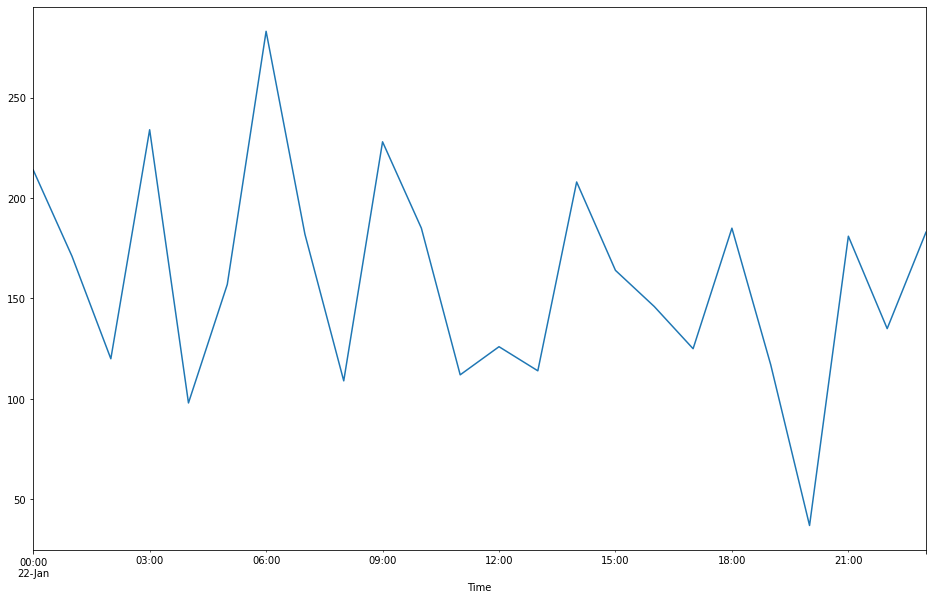

In [85]:
# 绘制请求走势图
log_df2 = log_df.copy()
# 为每行加一个request字段，值为1
log_df2["Request"] = 1
# 每一小时统计一次request数量，并将NaN值替代为0，最后绘制线性图，尺寸为16x9
log_df2.Request.resample("H").sum().fillna(0).plot(kind="line",figsize=(16,10))

In [86]:
# 分别绘图
# 分别对202，304，404状态重新取样，并放在一个列表里面
req_df_lis = [
log_df2[log_df2.Status == 200].Request.resample("H").sum().fillna(0), 
log_df2[log_df2.Status == 304].Request.resample("H").sum().fillna(0), 
log_df2[log_df2.Status == 404].Request.resample("H").sum().fillna(0) 
]


# 将三个dataframe组合起来
req_df = pd.concat(req_df_lis,axis=1)
req_df.columns = ["200", "304", "404"]
# 绘图
req_df.plot(figsize=(16,10))

AttributeError: 'DataFrame' object has no attribute 'Status'